Gabriela Vega
Machine Learning
Assignment 2
Shallow Models Training, Validation and Tuning


In [146]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


TASK 1: EDA

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df = pd.read_csv("/Users/gabyvega/Downloads/bike+sharing+dataset/hour.csv")

# displaying basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


EXPLANATION FOR CODE BELOW:
In the section below I am making a distribution of of our target value which is cnt (the total number of bike rentals per hour ). I used a histogram to display the shape and spread of this distribution as well as looking at the skewness of it. From the results we can see that the distribution has a very intense right skew where the majority of rentals fall between 0 and 100. In our context, this means that their is a peak time with higher counts and then relatively low rental activity through the rest of the hours.  

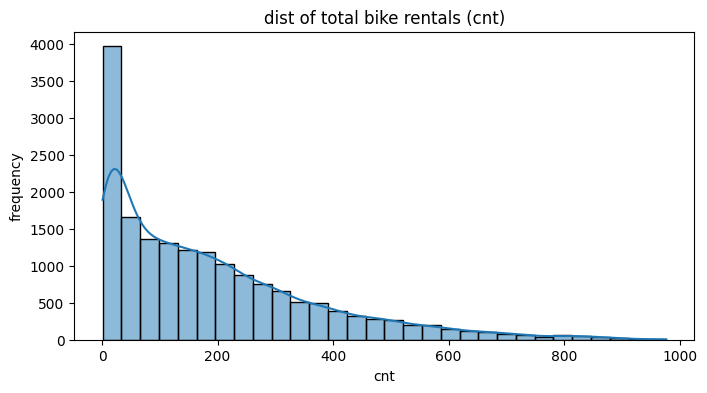

skewness of cnt: 1.2774116037490577


In [148]:
#checking target value dist

plt.figure(figsize=(8, 4))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('dist of total bike rentals (cnt)')
plt.xlabel('cnt')
plt.ylabel('frequency')
plt.show()

# skewness
print("skewness of cnt:", df['cnt'].skew())


EXPLANATION FOR CODE BELOW:
In the code below we are looking at rental activity changes because of time related features. I used boxplots to show the total rentals grouped by hour, weekday, month and season; this way we can look at the effect and importance of these features on our target (cnt). 

The rentals by hour show that rentals go up around 8 am and then again from 5-6pm, which is consistent with most peoples work schedules. Thois means that hour is an important factor that will likely play a role in our prediction.  

The rentals by weekday is pretty consistent accross all days in the week. The implies that weekday might be less relevant in our prediction.

The rentals by month show that in the middle of the year (from around april to september), there is a surge in activity. These are also the warmer months in the year meaning that the weather may be playing a role in results. 

The rentals by season confirm what the months boxplot implied as it shows that bike rentals are lower in the winter months (colder months) and highest in the summer months (hottest months). This again implies that temperature seems to be an important variable to consider. 

Overall, this section shows that hours, months and seasons are gonna be important in our prediction model while weekday by itself seems to be less meaningful (though it could become important when combined with other variables like holidays)

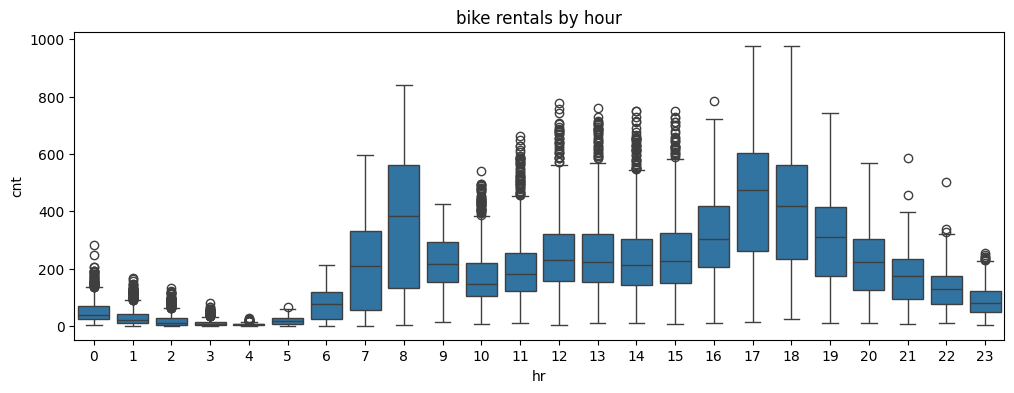

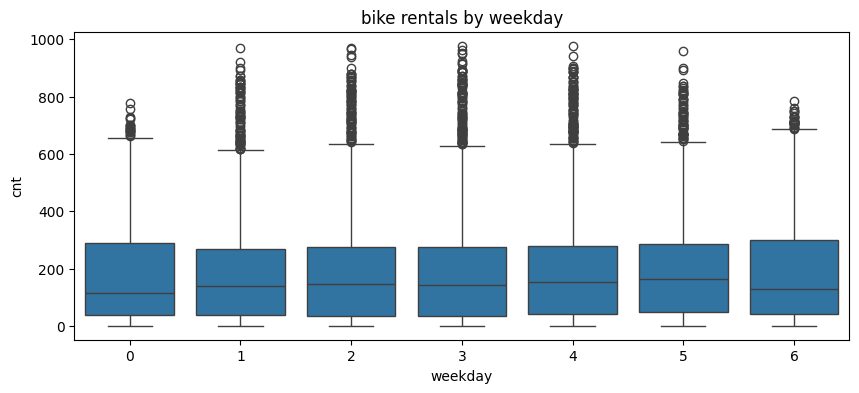

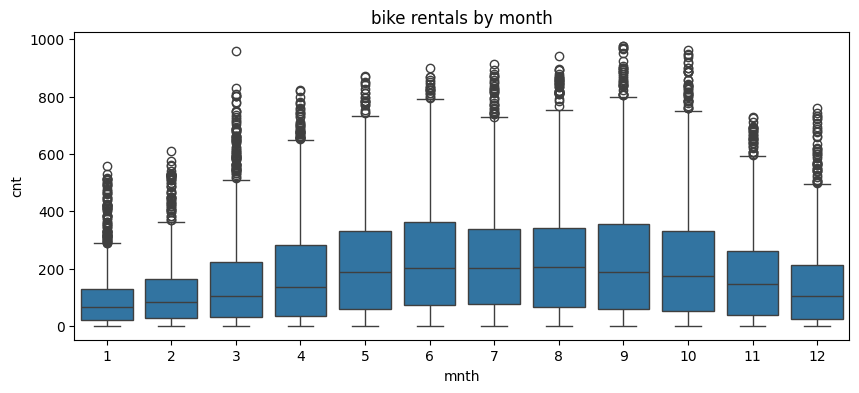

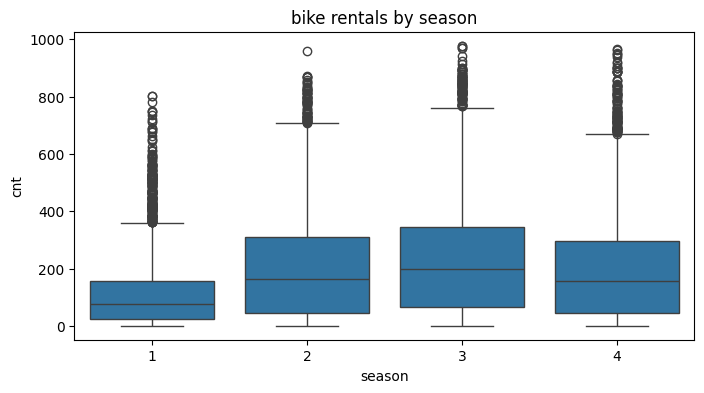

In [149]:
#temporal features

# rentals by hour
plt.figure(figsize=(12, 4))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title('bike rentals by hour')
plt.show()

# rentals by weekday
plt.figure(figsize=(10, 4))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('bike rentals by weekday')
plt.show()

# rentals by month
plt.figure(figsize=(10, 4))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('bike rentals by month')
plt.show()

# rentals by season
plt.figure(figsize=(8, 4))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('bike rentals by season')
plt.show()


EXPLANATION FOR CODE BELOW:
This next section examines how binary features like holidays and working days impact rental count. We are analyzing these as they could provide more information on the behavior patterns linked to the day types. The first boxplot examines bike rentals on a holiday vs non holiday and it shows that rentals on non holidays are a little bit higher than rentals on holidays. The working day vs non working day shows that on working days the bike rentals are higher than on non working days. The differences in both boxplots are not super dramatic, meaning that both these categories may have a slight inluence but their individual impact is limited. 

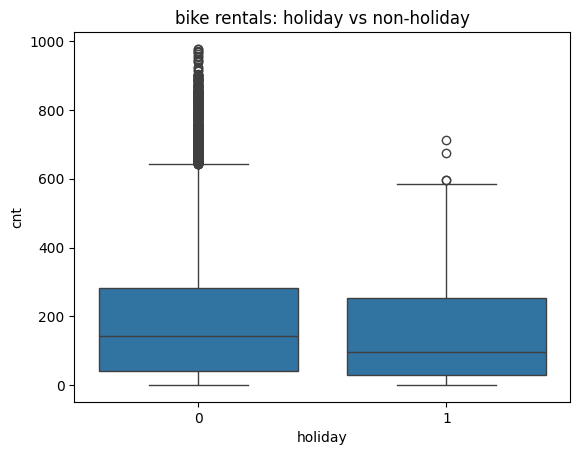

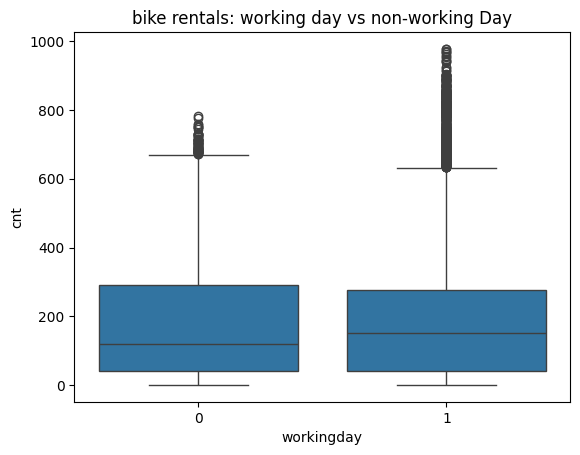

In [150]:
#binary features 

# rentals by holiday
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('bike rentals: holiday vs non-holiday')
plt.show()

# rentals by working day
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('bike rentals: working day vs non-working Day')
plt.show()


EXPLANATION FOR CODE BELOW:
The section of code below I am analyzing how weather related variables impact bike rentals. I took all our weather realted features (temp, atemp, humidity and windspeed).I first used a correlation heatmap to look at each feature vs our target value. The heatmap showed a very high correlation of .99 between atemp and temp which means they are essentially redundant against eachother (which makes sense logically as they are opposites of eachother). Both the temp values also showed a correlation of about .4 with cnt which indicates that warmer weather is associated with higher bike rental. On the other hand, humidity and windspeed showed a weaker correlation meaning that their influence is likely more subtle. The scatterplots further examined that the relationship of temperature and cnt indicates a peak in rentals during moderate values and then declines near the end when it gets too warm. Humidity shows a generally weak trend again, but it did show that higher humidity levels appear to decrease bike rentals slightly. Windspeed shows had a generally slightly negative relationship meaning that the more windy it is outside the less likely biking activity may be. 

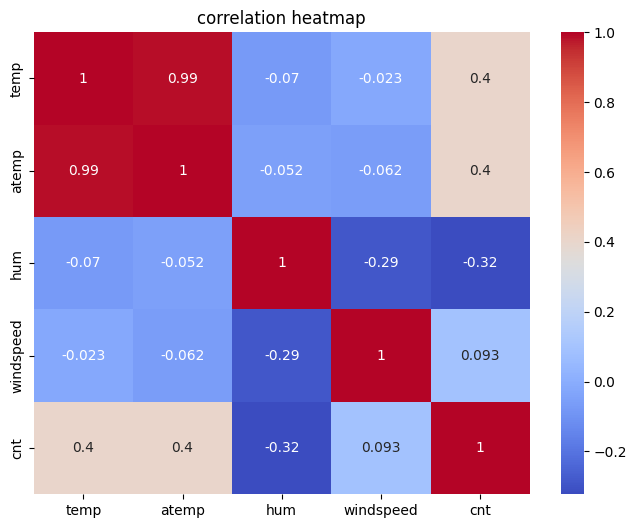

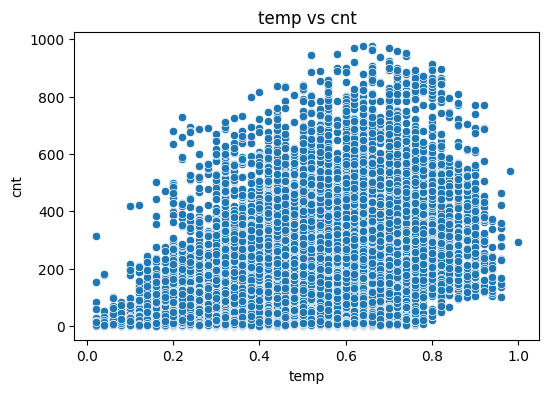

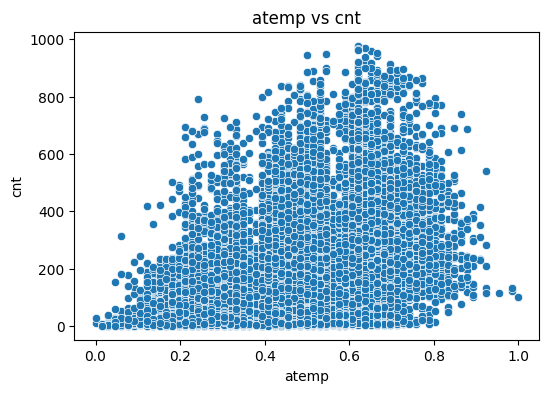

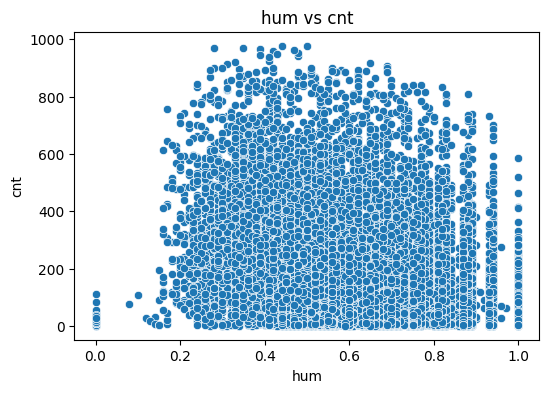

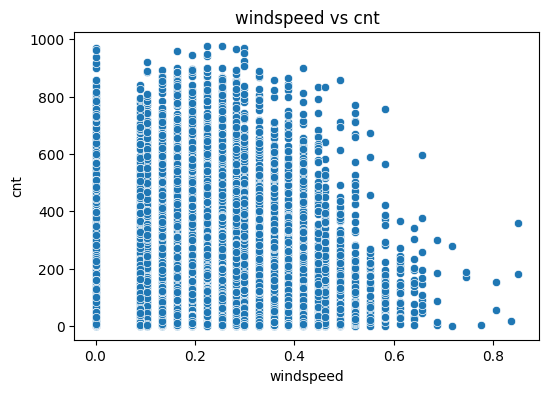

In [151]:
#weather related features

# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

# scatter plots
features = ['temp', 'atemp', 'hum', 'windspeed']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='cnt')
    plt.title(f'{feature} vs cnt')
    plt.show()


EXPLANATION FOR CODE BELOW:
In the section below I am first looking for potential outliers in my numerical features (cnt, temp, hum and windspeed) and I am visualizing this with a boxplot because it allows me to quickly and easily see which values fall outside the typical range. The cnt variable contains numerous outliers which is expected since as we discussed before, there are hours in the day with significant more demand than others. Since these values correspond to real world peak times I am interpreting them not as outliers/errors and rather as important data points. The rest of the features (temp, humidity and windpseed) all appear to be generally well distributed which means that there is not an immediate need for any type of transformation. While I could have used outlier removal technniques (like zscore filering or IQL thresholding) I chose to not do this as the points represent demand patters that will contribute to an accurate model rather than exceptions. 

After checking the outliers, I dropped values that are leaky or not relevant to our prediction. I first dropped "instant" because it is an ID column that has no real predictive worth at it is an arbitrary value. I dropped "dteday" since it duplicates data info that is already encoded in our other time based features. Finally, I dropped "casual" and "regisistered" because they directly sum up to form our target variable (cnt). Keeping these would introduce data leakage into our model because the model would learn to cnt by summing these two. Removing them makes sure that the model only learns from our other contextual features. 


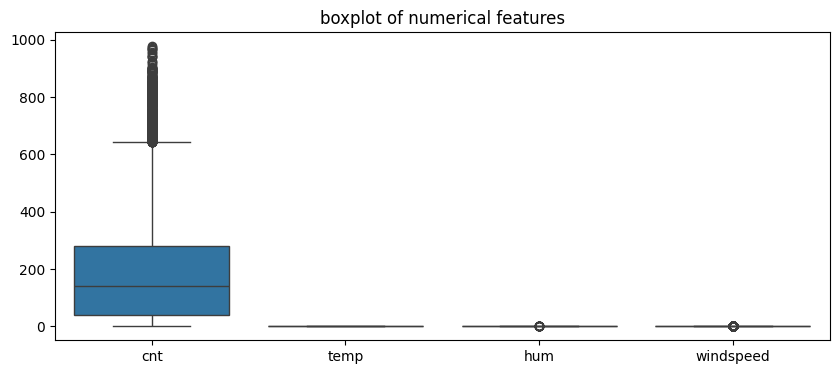

In [152]:
# outliers and dropping some columns

# looking for potential outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['cnt', 'temp', 'hum', 'windspeed']])
plt.title('boxplot of numerical features')
plt.show()

# dropping unused or leaky columns
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)


TASK 2: Data Splitting

EXPLANATION FOR CODE BELOW:
In this next step we are splitting the dataset into seperate training, testing and validation sets. First, I am seperating the target value from the feature set as this is what we are trying to predict. Then I do a 2-step splitting process where the first split divides the dataset to become 0.6 to the training set and the remaining .4 to a temporary set. After this, the temp set is further split equally into the training and validation set (so each one recieves .2 of the overall dataset). This approach is ensuring that the model is trained on one portion of the data, tuned on another and then tested on a never seen before portion. Another way to split the dataset would have been to use K-fold, but because our dataset is decently large the method we used is more fitting as it balances efficiency with model integrity better. I ended up choosing a 60-40 split because it is pretty balanced and a good option when working with medium to large datasets as we are. 

In [153]:
from sklearn.model_selection import train_test_split

# creating features (X) and target (y)
X = df.drop('cnt', axis=1)
y = df['cnt']

# first split: 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=42)

# scond split: 50% validation, 50% test of the temp set → 20% each overall
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# final sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 10427 samples
Validation set: 3476 samples
Test set: 3476 samples


TASK 3: Feature Engineering

EXPLANATION FOR CODE BELOW:
In the next section of code, I am applying sine and cosine transformations on our "hour" and "weekday" features. I am encoding them into cyclical variables because without it the model could misunderstand relationships like hour 23 and hour 0 since numerically these values are far apart but in a time context they are adjacent. This way, we are keeping the periodicity of the time data without the model interpreting these features linearly. After creating the new weekday_sin and weekday_cos features, I then drop the hr and weekday variables columns as we will continue using our new created features. An alternative method would have been using one hot encoding for these columns but that would only end up increasing dimensionality without preserving the circular relationship. 

In [154]:
#cyclical encoding

import numpy as np

# apply cyclical encoding
for df_ in [X_train, X_val, X_test]:
    df_['hr_sin'] = np.sin(2 * np.pi * df_['hr'] / 24)
    df_['hr_cos'] = np.cos(2 * np.pi * df_['hr'] / 24)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['weekday'] / 7)

# dropping original columns
X_train.drop(['hr', 'weekday'], axis=1, inplace=True)
X_val.drop(['hr', 'weekday'], axis=1, inplace=True)
X_test.drop(['hr', 'weekday'], axis=1, inplace=True)



EXPLANATION FOR CODE BELOW:
In the code below I am using one hot encoding on our categorical variables of "season", "weathersit" and "mnth" in order to turn them into binary values. I am first identifying my categorical variables that represent discrete features since the model is unable to understand category ids or strings. Then I am applying one hot encoding only on the training set in order to prevent data leakage since otherwise we would be giving the model information that it should not be seeing. We are also filling missing columns with 0 since this will indicate that those categories did not appear in that specific portion of the data. 

After this section, I am first checking if temp and atemp are highly correlated (which we know they are since we checked earlier but i still included it here just for clarity ) Since they are over 95% correlated, I am then removing atemp from the sets in order to avoid redundancy. I am scaling the continous features (temp, hum and windspeed) using the standard scalar and fittinng it only on the training data and then tranforming the validation and testing using the same scalar without refitting. This perserves data integrity and helps prevent data leakage. 

In [ ]:
# defining categorical columns to encode
cat_cols = ['season', 'weathersit', 'mnth']

# fitting get_dummies on training set only
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

# storing column names after encoding
encoded_columns = X_train_encoded.columns

# encoding val/test and aligning columns to training
X_val_encoded = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# aligning val/test to training columns (fills missing with 0)
X_val_encoded = X_val_encoded.reindex(columns=encoded_columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=encoded_columns, fill_value=0)

# replaces originals 
X_train = X_train_encoded
X_val = X_val_encoded
X_test = X_test_encoded


In [ ]:
from sklearn.preprocessing import StandardScaler

# continuous features to scale
cont_cols = ['temp', 'atemp', 'hum', 'windspeed']

# dropping highly correlated feature before scaling
import warnings

# checking correlation again
print(X_train[['temp', 'atemp']].corr())

# eliminating warnings just for the drop operation
if abs(X_train['temp'].corr(X_train['atemp'])) > 0.95:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=pd.errors.SettingWithCopyWarning)
        for df_ in [X_train, X_val, X_test]:
            df_.drop('atemp', axis=1, inplace=True)
    cont_cols.remove('atemp')


# scaling using .loc
scaler = StandardScaler()
X_train.loc[:, cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_val.loc[:, cont_cols] = scaler.transform(X_val[cont_cols])
X_test.loc[:, cont_cols] = scaler.transform(X_test[cont_cols])


          temp    atemp
temp   1.00000  0.98968
atemp  0.98968  1.00000


TASK 4: BASELINE MODEL, LINEAR REGRESSION

EXPLANATION FOR CODE BELOW:
In the section below I am implementing a linear regression model as a baseline. We are fitting this model on our training data. This process basically involves learning a linear relationship between our input features and the target value. After this training, the model predictions are made on the validation, essentially evaluating how the model preforms on unseen data. The evaluation measures we are taking into account here are our MSE (mean squared error), MAE (mean absolute error) and R squared. These will provide instights into our model performance. The MSE resulted in 15791.76 which means that the average squared difference between the predicted and actual value was pretty high which indicates that there is a lot of error in this metric. The MAE was 92.01 and it is showing the average magnitude of prediction error in actual unit which in our context means that that the models prediction is off by about 92 bike rentals every hour. This result is reinforcing what the MSE indicated. Finally, the r squared metric is essentially saying that only about 51% of the variance can be explained by the model. As it can only explain a little over half we know that the model is doing this relatively poorly. 

Overall, the results indicate that the linear regression model is struggling to to explain and understand the complexity of the data. Since in our context we have a lot of temporal and weather related variables it linearity does not make much sense for this context. Our data is interacting in non linear ways meaning that another type of model will likely be better at modelling the complex patterns of our data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# initializing and training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predicting on validation set
y_val_pred = lr_model.predict(X_val)


In [ ]:
# evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Linear Regression Performance on Validation Set:")
print(f"  MSE: {mse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.4f}")


Linear Regression Performance on Validation Set:
  MSE: 15791.76
  MAE: 92.01
  R²: 0.5141


EXPLANATION FOR CODE BELOW:
The plots below provide a visual representation of the residual distribution. The first plot is a historgram of the residuals ( residuals are the difference between the predicted values and the actual values) For assumptions of a linear regression line to hold the residuals should be normally distributed and centered around 0. As we can see from our graph however, our model has a slight right skew while still being kind of bell shaped. This means that the model is more liekly to underpredict than overpredict. This reinforces the poor r squared that we got before as it shows that the linear regression is not good at capturing the compelxity in our data. The second plot shows the actual values vs the predicted values. I am doing this because I want to check for heteroscedasticity and non linear patterns. In a good linear fit, these values will be randomly scattered throughout the horizontal line. As we can see though, once again our plot goes against this as the spread of residuals increases with the predicted value. Essentially, as the predicted bike rental count gets larger, the models error begins varying more. The residuals also do not look to be totally random as there is somewhhat of a pattern to them. This behavior once again contributes to my conclusion that the linear regression model is not the right choice to model our data as it fails to capture the necessary complexity and is not flexible enough to capture the dynamic nature of our dataset.  

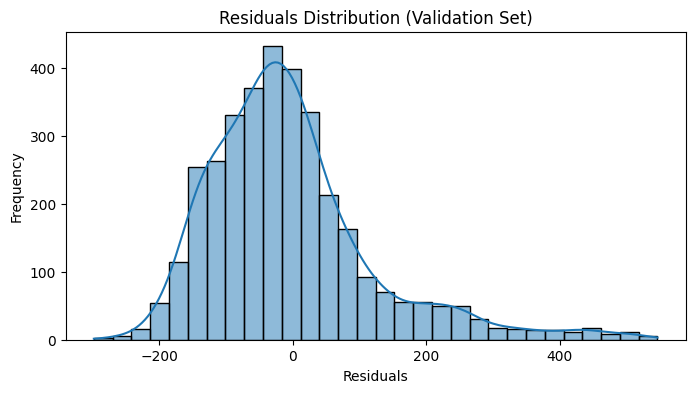

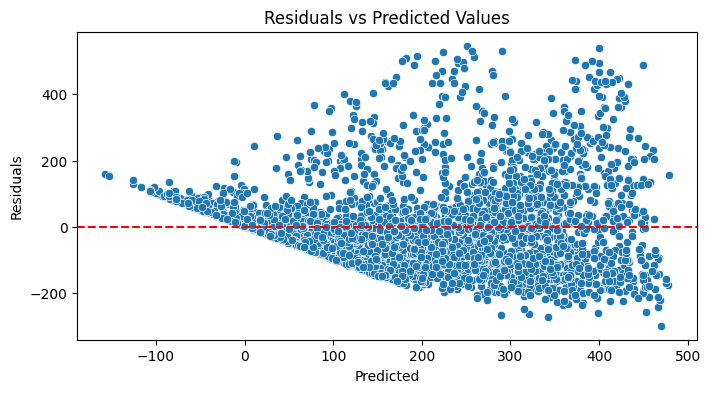

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# residuals
residuals = y_val - y_val_pred

# plotting residuals dist
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("residuals distribution")
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.show()

# residuals vs predictions
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_val_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("residuals vs predicted values")
plt.xlabel("predicted")
plt.ylabel("residuals")
plt.show()


TASK 5: RANDOM FOREST REGRESSION


EXPLANATION FOR CODE BELOW:
In the following section I am using and then evuluating a random forrest regression model. This method is basically one that learns based on decesion trees (builds multiple regression trees and then aggregates their prediction to improve the models accuracy). I am initiating my model with 100 decesion trees because it provides a good tradeoff between performance and accuracy. The model is then trained using the x_train features and y_train which has our target value. This is how the model is learning to understand the relationship between the input features and our target value. After the training is done the model is making its predictions and then comparing them with the actual values in order to measure its performance. 

Model Performance: 
MSE: As we have mentioned before, this metric measures the squared differences between predicted and real values. Our result for this was of 1801.72 which indicates that on average the squared prediction error is relatively low. Compared with the Linear regression model which had an MSE of over 15000 we can see that this is a significant improvement meaning that our random forrest is more accurate in its predictions.

MAE: Once again, this value is calculating the avg of the absolute different. Our result of 25.8 means that on average our models prediction is off by about 26 bike rentals per hour. Within our context, this is a reasonable MAE and especially when comparing it to our linear regression (92) we can conclude that this is a pretty good MAE.

R squared: As explained before, this value explains how much the variance in the target variable is explained by the model. Our r squared of 94% means that 94% of the variability in bike rentals is being succesfully explained by the model. This means our model is very good at identifying the patterns and trends in our data and it also means that the random forrest approach is well suited for understanding how the features affect the bike rentals. (and its of course better than the linear regression model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# initializing with default settings
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predicting 
y_val_rf = rf_model.predict(X_val)


In [ ]:
# evaluation metrics
mse_rf = mean_squared_error(y_val, y_val_rf)
mae_rf = mean_absolute_error(y_val, y_val_rf)
r2_rf = r2_score(y_val, y_val_rf)

print(f"random forest performance on validation Set:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  MAE: {mae_rf:.2f}")
print(f"  R²: {r2_rf:.4f}")


Random Forest Performance on Validation Set:
  MSE: 1801.72
  MAE: 25.80
  R²: 0.9446


EXPLANATION FOR CODE BELOW:
In the code below I am looking at which features contribute the most in the predictions. We are first extracting the importance score of each feature which just show how useful that specific feature is decesion making and then pairing this score with feature name. The result of our plot shows that the most significant features are hr_sin and hr_cos, meaning that the hours of the day are by far the most influential features as bike rentals is very affected by the time of the day. Temp and workingday were also shown to be important, while months, season and weathersit were shown to be less impactful and could be considered for removal if we needed to simplify the model. 

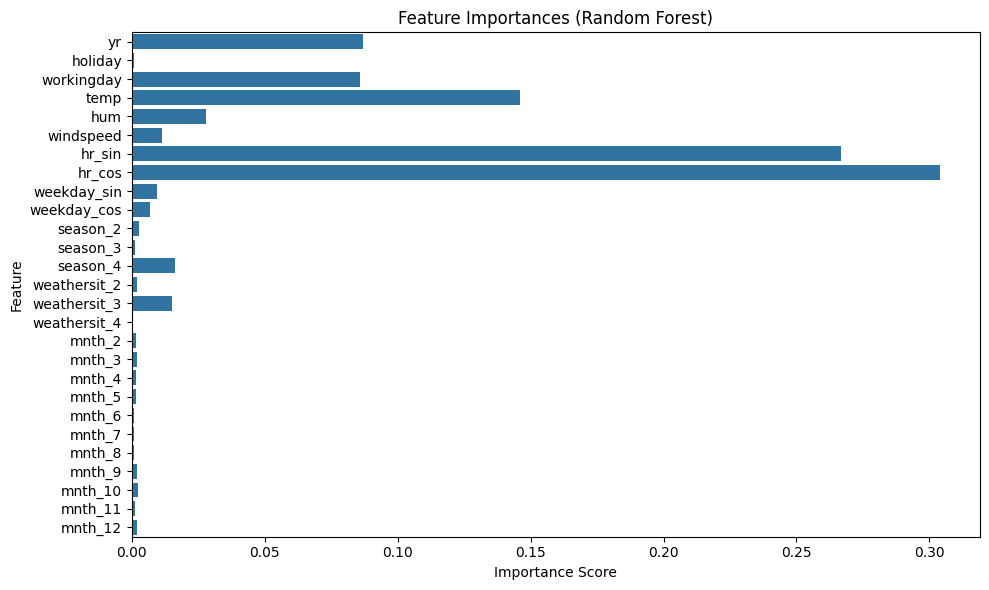

In [ ]:
# feature importance
importances = rf_model.feature_importances_
features = X_train.columns

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


TASK 6: Gradient Boosting Regressor.

EXPLANATION FOR CODE BELOW:
In the following section I am implementing and then evaluating a gradient boosting regression model. Gradient boosting is a technique that builds a ensemble of typically shallow decesion trees, where each one corrects the error of the previous leading to a strong predictive model. I initiated the model with 100 boosting stages (again for a good tradeoff of performance and complexity) and a learning rate of .1 which will control the distribution of each tree. The model is learning using the features and the target value to try to learn its relationship. 

Evaluation metrics (I wont mention what each one is as I have done that twice above)
MSE: Our result of 4519.74 means that on average the model's prediction deviates from the true value by a squared error of 4519. When compared with our MSE results from our linear regression and random forrest we can see that this model is better than the linear but worse than the forrest. 

MAE: Our results show that this models predictions are off by about 47 rentals on average. This reinforces our previous result as it shows that this model is better than the linear regression but poorer than the random forrest. 

R squared: our value of 0.8609 tells us that about 86% of the variance in bike rentals can be explained by our model. While this is a strong result that shows that this model is a good fit to model our data, it is still not as good as the results from the random forrest. 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# train sklearn gradient boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# predicting
y_val_gbr = gbr_model.predict(X_val)


In [ ]:
# metrics
mse_gbr = mean_squared_error(y_val, y_val_gbr)
mae_gbr = mean_absolute_error(y_val, y_val_gbr)
r2_gbr = r2_score(y_val, y_val_gbr)

print("gradient boosting performance:")
print(f"  MSE: {mse_gbr:.2f}")
print(f"  MAE: {mae_gbr:.2f}")
print(f"  R²: {r2_gbr:.4f}")


Gradient Boosting (sklearn) Performance on Validation Set:
  MSE: 4519.74
  MAE: 47.15
  R²: 0.8609


EXPLANATION FOR CODE BELOW:
The following code is assesing the quality of predictions this model generated. These plots are helping us understand whether the model is making systematic erros and whether the residuals are normally distributed. The first plot is a historgram of the residuals that are going to allow me to visualize the distribution of the residuals. As we can see, our residuals are normally distributed with a bell shape (although it does have a slight right skew). This supports the validity of the model. The second plot is showing the residuals vs the actual values. Our results show that the residuals are pretty evenly distributed above and below the red horizontal line at 0. This means that there is possibly some homoescedasticity (prediction errors increase with larger predicted values) which is not necesarilly a negative thing but is something to be aware of. Overall, both plots show that the gradient boosting is performing well and handles different ranges of data pretty effectively. 

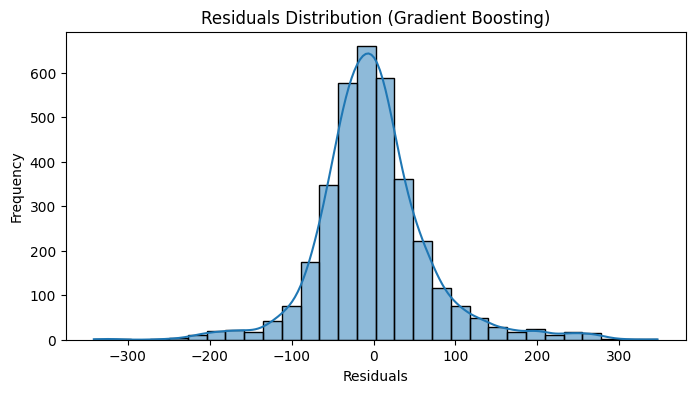

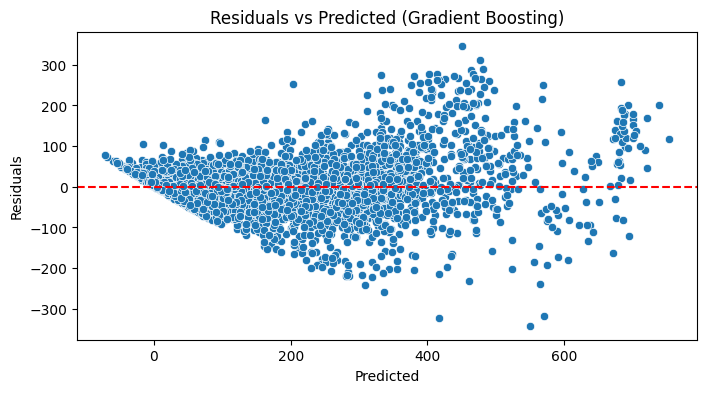

In [ ]:
# residuals
residuals_gbr = y_val - y_val_gbr

# plot distribution
plt.figure(figsize=(8, 4))
sns.histplot(residuals_gbr, bins=30, kde=True)
plt.title("residuals distribution (gradient boosting)")
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.show()

# plot scatter
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_val_gbr, y=residuals_gbr)
plt.axhline(0, color='red', linestyle='--')
plt.title("residuals vs predicted (gradient boosting)")
plt.xlabel("predicted")
plt.ylabel("residuals")
plt.show()


TASK 7: HYPERPARAMETER TUNING

EXPLANATION FOR CODE BELOW:
The following section we are trying to optimize the model's performance by identifying a better combination of hyperparameters which could potentially lead to a reduced error and a better generalization. I am first perfoming this on the random forrest model which was already pretty strong to begin with. I will only perform this step on the random forrest and the gradient booster and they were our 2 best models and the linear regression proved to be quite poor at working with and understanding the dataset. 

Firstly, I am defining the parameter spaces through the rf_params dictionary. I set several parameters (each one is defined in the code) which will control the complexity and flexibility of the tree. I chose a larger number of estimators because they can increase accuracy as they increase training time and then i chose smaller values for the number of samples because this will allow the tree to grow deeper. I then use the randomized search to randomly sample from this hyperparameter space I just created. I am testing 20 different combinations using 5 cross validations. The scoring method I chose was the MSE because this will allow me to then minimize the prediction error. Once the randomized search is completed, the best combination of hyperparameters found during crossvalidation will be stored in rf_random_search.best_estimator_. We are performing all of this since we want to search for the a configuration that can improve the models predictive capabilities. 


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# definining parameter space
rf_params = {
    'n_estimators': [100, 200, 300], # numb of trees in forrest 
    'max_depth': [None, 10, 20, 30], # max depth
    'min_samples_split': [2, 5, 10], # min numb of samples needed to split an internal node
    'min_samples_leaf': [1, 2, 4] # min numb of samples recquired to be a leaf node
}

# randomized search
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

rf_random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=1)

EXPLANATION FOR CODE BELOW:
The results show that tuning mantained a high performance while slightly improving the model structure. The best combination of parameters were found to be 300 for n_estimators (meaning the model now uses more trees), 2 for our min_sample_split and 1 for min_samples_leaf (this gives the trees the flexibility to split even with few samples, reducing bias) and 30 more the max depth (which allows the tree to grow deeper, capturing more complexities present in the data). 

Evaluation perfomance:
MSE: Our result was 1803.54 which is basically identical to our untined result from the forrest. While this did not dramatically improve it still remained optimal post tuning.
MAE: Our MSE of 25.81 is again nearly similar to identical to our previous result, confirming that the model's predictions are consistently close to the real values on average.
R squared: Again, our result was still of about 94% which is proving that the random forrest was performing near optimally even without tuning. 

The results of the feature importances are also basically identical to the ones before. While tuning did not significantly improve this model, its still high result make this model a great contendor for the best model. 



In [ ]:
best_rf = rf_random_search.best_estimator_
y_val_rf_tuned = best_rf.predict(X_val)

print("best RF params:", rf_random_search.best_params_)
print("tuned random forest performance:")
print(f"  MSE: {mean_squared_error(y_val, y_val_rf_tuned):.2f}")
print(f"  MAE: {mean_absolute_error(y_val, y_val_rf_tuned):.2f}")
print(f"  R²: {r2_score(y_val, y_val_rf_tuned):.4f}")


Best RF Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tuned Random Forest Performance:
  MSE: 1803.54
  MAE: 25.81
  R²: 0.9445


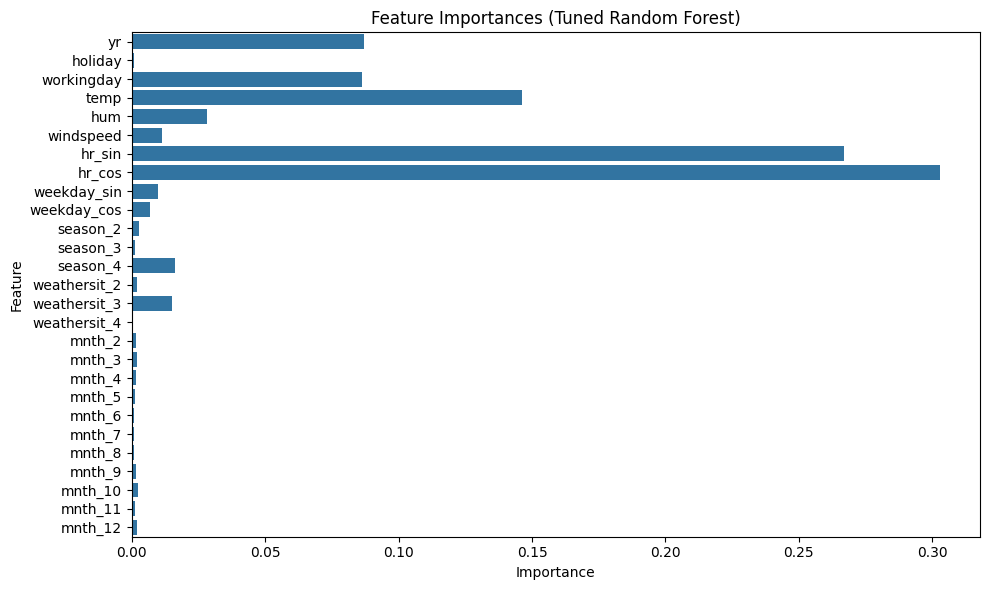

In [168]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_rf.feature_importances_, y=X_train.columns)
plt.title('Feature Importances (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [169]:
pip install scikit-optimize



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


EXPLANATION FOR CODE BELOW:
In the following section we are again performing hyperparameter tuning but this time on our gradient booster. I chose to use Bayesian optimization for this step. I chose to not use other options such as grid search (which tries every combination) and random search (which samples randomly) because Bayesian builds a probabilistic model (gaussian process) of the objective function and uses that to decide where to sample next. 
This makes it significantly more efficient, especially when the parameter space is large. Gradient boosting is also very sensitive to its hyperparemers, meaning that the parameters need to be balanced to avoid underfitting and overfitting. This makes it very well suited with the bayesian search as it is good at finding appropriate combinations faster and more effectively than the other options. 
I again defined my search space parameters (number of boosting trees, learning rate, max depth and subsample) that will define the range of values explored. 

In [170]:
from skopt import BayesSearchCV
search_space = {
    'n_estimators': (50, 300),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'subsample': (0.5, 1.0)
}


In [171]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

opt = BayesSearchCV(
    gbr,
    search_spaces=search_space,
    n_iter=20,
    cv=5,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

opt.fit(X_train, y_train)


BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
              n_iter=20, n_jobs=-1, random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': (0.01, 0.3, 'log-uniform'),
                             'max_depth': (3, 10), 'n_estimators': (50, 300),
                             'subsample': (0.5, 1.0)})

EXPLANATION FOR CODE BELOW:
The results of the tuning found that the best combinations of parameters where a learning rate 0f 0.04, max depth of 8, 300 trees and a sumbsample of 0.55 (55% of data is randomly samples for each tree). 

Performance Evaluation:
MSE: Our result of 1442.04 is smaller than our previous models which means that this improved model is making less errors overall.
MAE: Our model is off by about 23 rentals which is once again significantly lower than the previous result by our gradient boosting and is better than the result from our random forrest after tuning. 
R squared: This impproved model explains about 95.5% of the variation in bike rentals which is higher than all our previous r squared. This indicates that this model is very accurate and fits the data very well. 

In [ ]:
best_gbr = opt.best_estimator_
y_val_gbr_tuned = best_gbr.predict(X_val)

print("best GBR params:", opt.best_params_)
print("tuned gradient boosting performance:")
print(f"  MSE: {mean_squared_error(y_val, y_val_gbr_tuned):.2f}")
print(f"  MAE: {mean_absolute_error(y_val, y_val_gbr_tuned):.2f}")
print(f"  R²: {r2_score(y_val, y_val_gbr_tuned):.4f}")


Best GBR Params: OrderedDict({'learning_rate': 0.040726180550054995, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.553444204100766})
Tuned Gradient Boosting Performance:
  MSE: 1442.04
  MAE: 23.16
  R²: 0.9556


TASK 9: MODEL SELECTION AND TEST SET EVALUATION

EXPLANATION FOR CODE BELOW:
The goal of this following section is to choose the best performing model and prepare it for its final evaluation. I am first combining x and y to form a large training dataset that the model can learn from (this improves generalization). The final model I am using is the gradient booster since the previous results showed that it peprformed the best post tuning. The model is then trained on the combined training data which is maximizing the data availiable while still ensuring that the test set remains untouched (which is critical for a fair evaluation). 

In [ ]:
# combining X and y
X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])


In [ ]:
# use best hyperparameters
final_model = GradientBoostingRegressor(
    learning_rate=opt.best_params_['learning_rate'],
    n_estimators=opt.best_params_['n_estimators'],
    max_depth=opt.best_params_['max_depth'],
    subsample=opt.best_params_['subsample'],
    random_state=42
)

final_model.fit(X_final_train, y_final_train)


GradientBoostingRegressor(learning_rate=0.040726180550054995, max_depth=8,
                          n_estimators=300, random_state=42,
                          subsample=0.553444204100766)

EXPLANATION FOR CODE BELOW:
The following code is first using our final model that was chosen earlier to predict the target variable. 

Final Evaluation:
MSE: The final MSE was calculated to be 1489.68 which once again represents the average squared difference between predicted and actual bike rentals. This value is consistent with what we have seen earlier, indicating that no major overfitting took place. 
MAE: This value ended up being 22.79 which means that on average our predictions were off by about 23 rentals. This is a very good result that means the error is very small. 
R squared: Our final model is able to explain about 96% of the variation in bike rentals. This score is very high and indicates that the model is generalizing very well. 
This final step is confirming that our model is very strong and performs very well on unseen data, showing both a low error and a high explanatory percentage. This step proves our model is very robust and succesfull.   




In [ ]:
# predict on test set
y_test_pred = final_model.predict(X_test)

# final evaluation
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(" final model performance:")
print(f"  MSE: {mse_test:.2f}")
print(f"  MAE: {mae_test:.2f}")
print(f"  R²: {r2_test:.4f}")


 Final Model Performance on Test Set:
  MSE: 1489.68
  MAE: 22.79
  R²: 0.9526
